In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# 데이터셋 로드
file_path = 'breast_cancer.csv' 
data = pd.read_csv(file_path)

# 데이터셋 기본 정보 확인
print(data.info())
print(data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [23]:
# 데이터셋에서 불필요한 열 제거
data.drop(columns=['id'], inplace=True)
print(data.head())

  diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0         M        17.99         10.38          122.80     1001.0   
1         M        20.57         17.77          132.90     1326.0   
2         M        19.69         21.25          130.00     1203.0   
3         M        11.42         20.38           77.58      386.1   
4         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0         0.2419  ...         25.38          17.33 

In [24]:
# 결측값 확인
missing_values = data.isnull().sum()
print(missing_values[missing_values > 0])

# 결측값이 없는 경우, 아래의 메시지를 출력
if missing_values.sum() == 0:
    print("결측값이 없습니다.")

Series([], dtype: int64)
결측값이 없습니다.


In [25]:
# 'diagnosis' 열을 숫자로 변환 (M: 1, B: 0)
data['diagnosis'] = data['diagnosis'].replace({'M': 1, 'B': 0})
print(data['diagnosis'].head())

0    1
1    1
2    1
3    1
4    1
Name: diagnosis, dtype: int64


/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Co

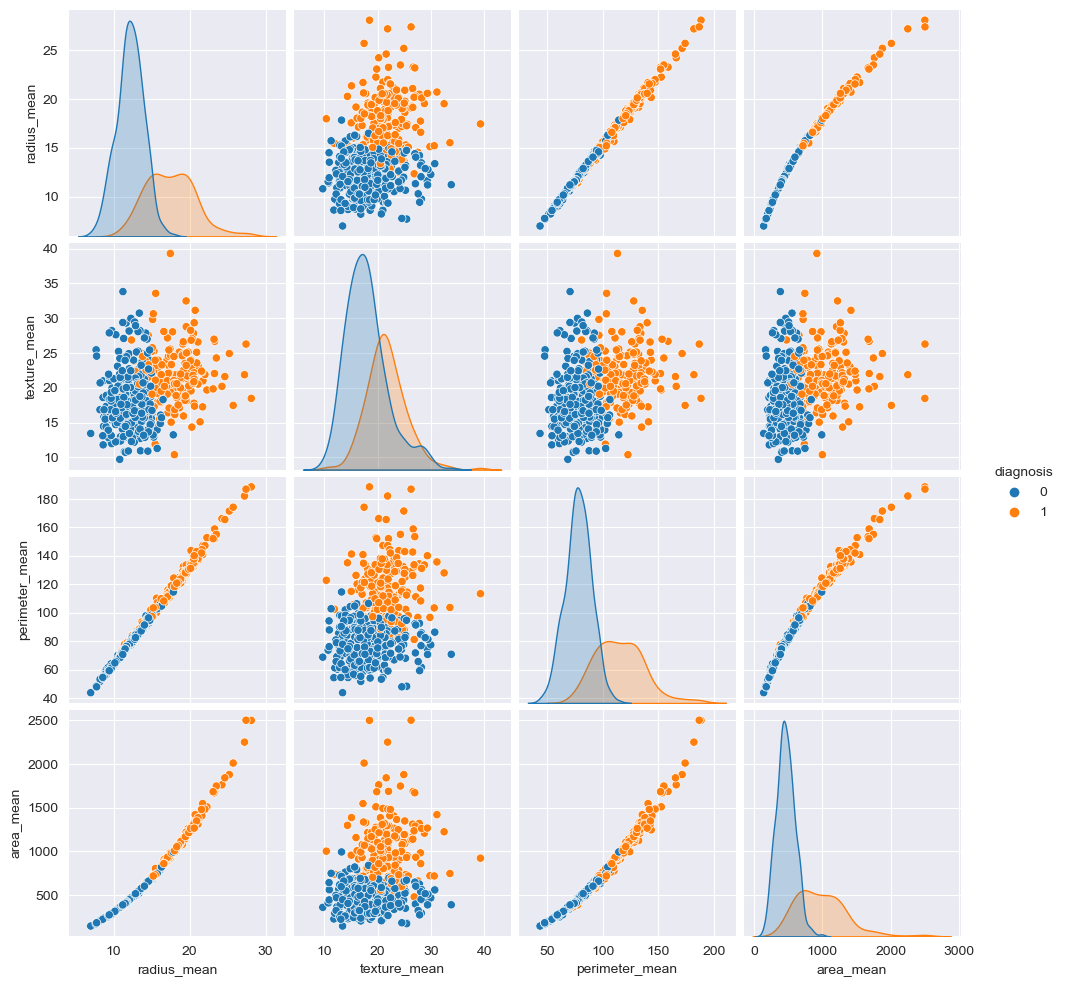

In [26]:
# 데이터셋에서 inf 값을 NaN으로 변환
data = data.replace([np.inf, -np.inf], np.nan)

# NaN이 포함된 행 제거
data = data.dropna()

# diagnosis별 특징 분포 시각화
sns.pairplot(data, hue='diagnosis', vars=['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean'])
plt.show()

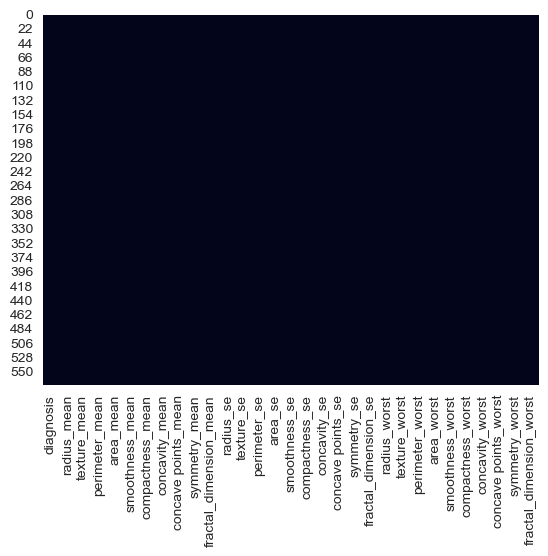

In [27]:
# 히트맵을 사용한 결측값 시각화 (결측값이 없을 경우 예시 코드)
sns.heatmap(data.isnull(), cbar=False)
plt.show()

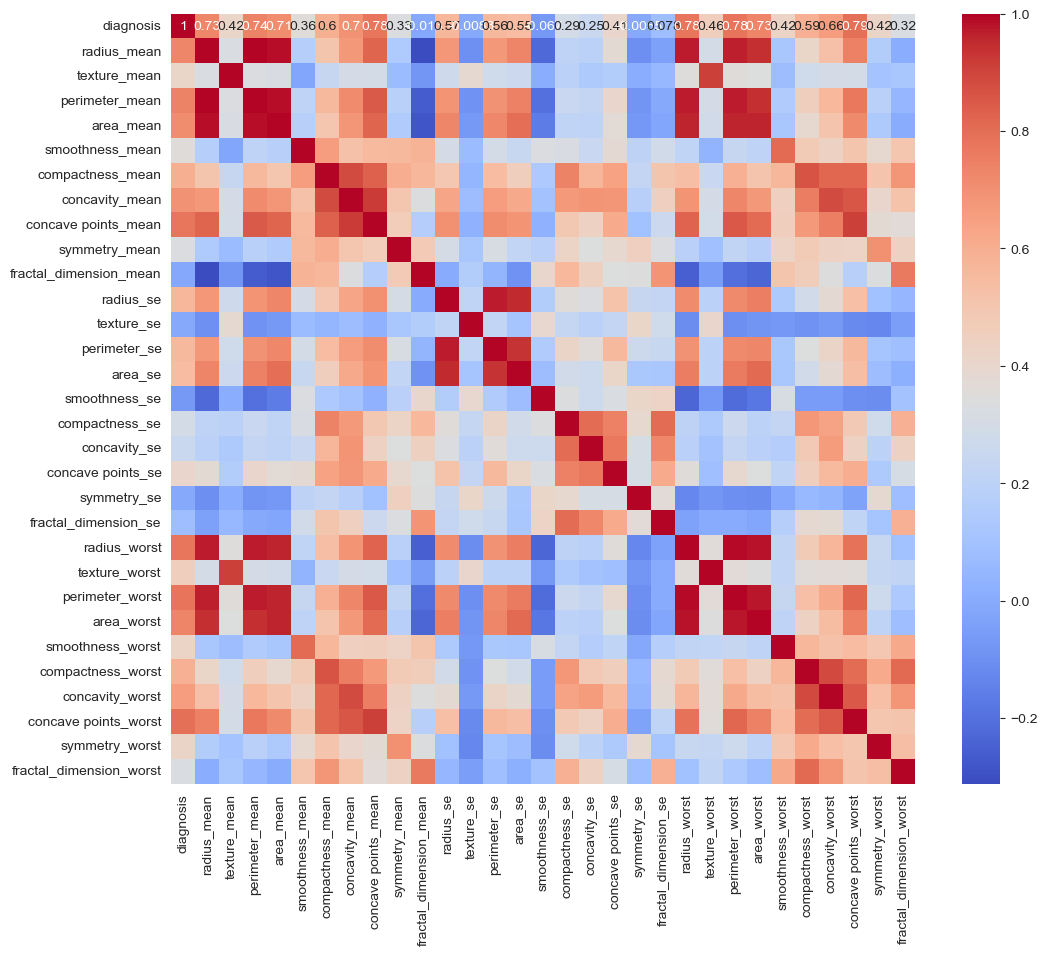

In [28]:
# 상관 행렬 히트맵
plt.figure(figsize=(12, 10))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

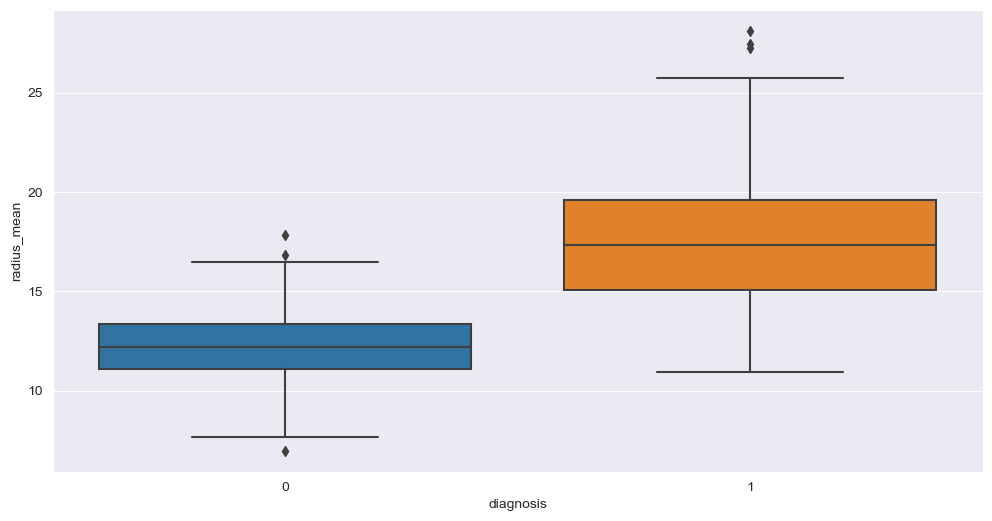

In [29]:
# Box Plot으로 특정 변수의 분포 시각화
plt.figure(figsize=(12, 6))
sns.boxplot(x='diagnosis', y='radius_mean', data=data)
plt.show()

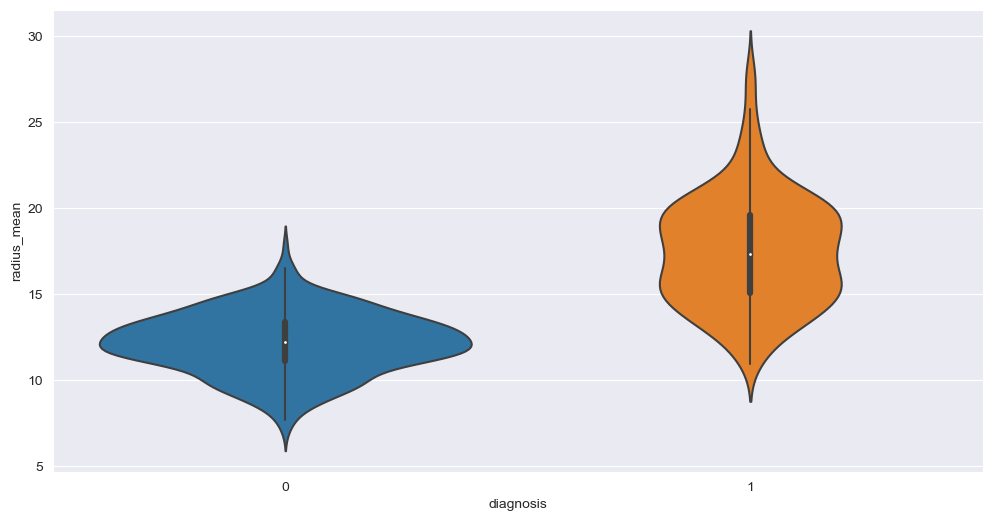

In [30]:
# Violin Plot으로 특정 변수의 분포 시각화
plt.figure(figsize=(12, 6))
sns.violinplot(x='diagnosis', y='radius_mean', data=data)
plt.show()

In [35]:
from sklearn.preprocessing import MinMaxScaler

# 필요한 열만 선택하여 정규화
features = data.columns[1:]  # 'diagnosis' 열을 제외한 나머지 열 선택
scaler = MinMaxScaler()
data[features] = scaler.fit_transform(data[features])

print(data.head())

   diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0          1     0.521037      0.022658        0.545989   0.363733   
1          1     0.643144      0.272574        0.615783   0.501591   
2          1     0.601496      0.390260        0.595743   0.449417   
3          1     0.210090      0.360839        0.233501   0.102906   
4          1     0.629893      0.156578        0.630986   0.489290   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0         0.593753          0.792037        0.703140             0.731113   
1         0.289880          0.181768        0.203608             0.348757   
2         0.514309          0.431017        0.462512             0.635686   
3         0.811321          0.811361        0.565604             0.522863   
4         0.430351          0.347893        0.463918             0.518390   

   symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0       0.686364  ...      0.620776       0.1

In [36]:
from sklearn.model_selection import train_test_split

# 특징(X)와 타겟(y) 설정
X = data[features]
y = data['diagnosis']

# 학습용 데이터와 테스트용 데이터로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=333)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(398, 30) (171, 30) (398,) (171,)


In [37]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# 다양한 모델 테스트
models = [
    ('Decision Tree', DecisionTreeClassifier(max_depth=4)),
    ('Random Forest', RandomForestClassifier(n_estimators=100)),
    ('SVM', SVC(kernel='linear')),
    ('KNN', KNeighborsClassifier(n_neighbors=5))
]

# 모델 성능 비교
for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f'{name} Accuracy: {acc * 100:.2f}%')

Decision Tree Accuracy: 90.64%
Random Forest Accuracy: 95.32%
SVM Accuracy: 96.49%
KNN Accuracy: 95.32%


In [38]:
from sklearn.model_selection import GridSearchCV

# 랜덤 포레스트 모델의 하이퍼파라미터 튜닝
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=RandomForestClassifier(), param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# 최적의 파라미터와 모델의 성능
print('Best Params:', grid_search.best_params_)
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f'Best Model Accuracy: {acc * 100:.2f}%')

# 모델 평가
from sklearn.metrics import confusion_matrix, classification_report

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Params: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best Model Accuracy: 95.32%
[[108   4]
 [  4  55]]
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       112
           1       0.93      0.93      0.93        59

    accuracy                           0.95       171
   macro avg       0.95      0.95      0.95       171
weighted avg       0.95      0.95      0.95       171

